In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
from feature_selector import FeatureSelector
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Dataframe

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
conveer = [train, test]

In [5]:
print(train.shape)
train.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
#Таблица пропусков
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Кол-во пропусков', 1 : '% Пропусков'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% Пропусков', ascending=False).round(1)
        print ("Dataframe имеет " + str(df.shape[1]) + " признаков.\n"      
            "Имеется " + str(mis_val_table_ren_columns.shape[0]) +
              " признаков с пропущенными значениями.")
        return mis_val_table_ren_columns

In [7]:
missing_values_table(train)

Dataframe имеет 81 признаков.
Имеется 19 признаков с пропущенными значениями.


,Кол-во пропусков,% Пропусков
PoolQC,1453,99.5
MiscFeature,1406,96.3
Alley,1369,93.8
Fence,1179,80.8
FireplaceQu,690,47.3
LotFrontage,259,17.7
GarageType,81,5.5
GarageYrBlt,81,5.5
GarageFinish,81,5.5
GarageQual,81,5.5


In [8]:
missing_values_table(test)

Dataframe имеет 80 признаков.
Имеется 33 признаков с пропущенными значениями.


,Кол-во пропусков,% Пропусков
PoolQC,1456,99.8
MiscFeature,1408,96.5
Alley,1352,92.7
Fence,1169,80.1
FireplaceQu,730,50.0
LotFrontage,227,15.6
GarageCond,78,5.3
GarageYrBlt,78,5.3
GarageQual,78,5.3
GarageFinish,78,5.3


In [9]:
cat_columns = train.dtypes[train.dtypes == 'object'].index
number_columns = train.dtypes[train.dtypes != 'object'].index

# Drop Feauture

In [10]:
X = train.drop(['SalePrice', 'Id'], axis=1)
Y = train[['SalePrice']]

In [11]:
drop_feature = [] #создание списка удаленных признаков

In [12]:
fs = FeatureSelector(data = X, labels = Y)

In [13]:
fs.identify_missing(missing_threshold = 0.6) # пропуски от 60%
drop_feature.append(fs.ops['missing']) 

4 features with greater than 0.60 missing values.



In [14]:
fs.identify_collinear(correlation_threshold = 0.98) #высокая корреляция между признаками 
drop_feature.append(fs.ops['collinear'])

0 features with a correlation magnitude greater than 0.98.



In [15]:
#удаляем признаки из обоих df
def drop_f(conveer):
    
    for i in conveer:
        for c in drop_feature[0]:
            i.drop(c, axis=1, inplace=True)


In [16]:
drop_f(conveer)

In [17]:
print(f'\nВсего удалено {len(drop_feature[0])} признаков',
     f'\nСписок удаленных признаков {drop_feature[0]}')


Всего удалено 4 признаков 
Список удаленных признаков ['Alley', 'PoolQC', 'Fence', 'MiscFeature']


In [18]:
drop_feature[0]

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [19]:
for i in conveer:
    del i['Id']

Теперь посмотрим, сколько пропусков осталось после удаления некоторых признаков

In [20]:
missing_values_table(train)

Dataframe имеет 76 признаков.
Имеется 15 признаков с пропущенными значениями.


,Кол-во пропусков,% Пропусков
FireplaceQu,690,47.3
LotFrontage,259,17.7
GarageType,81,5.5
GarageYrBlt,81,5.5
GarageFinish,81,5.5
GarageQual,81,5.5
GarageCond,81,5.5
BsmtExposure,38,2.6
BsmtFinType2,38,2.6
BsmtQual,37,2.5


In [21]:
missing_values_table(test)

Dataframe имеет 75 признаков.
Имеется 29 признаков с пропущенными значениями.


,Кол-во пропусков,% Пропусков
FireplaceQu,730,50.0
LotFrontage,227,15.6
GarageYrBlt,78,5.3
GarageCond,78,5.3
GarageQual,78,5.3
GarageFinish,78,5.3
GarageType,76,5.2
BsmtCond,45,3.1
BsmtQual,44,3.0
BsmtExposure,44,3.0


# Analysis

In [22]:
#статистика вещественных признаков 
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [23]:
#статистика дискретных признаков 
train.describe(include=['O'])

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,...,1460,1460,770,1379,1379,1379,1379,1460,1460,1460
unique,5,2,4,4,2,5,3,25,9,8,...,4,7,5,6,3,5,5,3,9,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal
freq,1151,1454,925,1311,1459,1052,1382,225,1260,1445,...,735,1360,380,870,605,1311,1326,1340,1267,1198


Разбиение признаков на вещественные и дискретные путем типа данных не принесла должного результата. <br> Например признак OverallQual был распознан как вещественный, так как он имеет тип int. Хотя данный признак является дискретным. Я задам пороговое значение в 45 уникальных значений для того чтобы разбить признаки на вещественные и дискретные.

In [24]:
number_columns = [] #вещественные признаки
cat_columns = [] #дискретные признаки

In [25]:
for i in train.columns[1:-1]: # разбиение признаков на вещественные и дискретные 
    if(train[i].nunique() > 45):
        number_columns.append(i)
    else:
        cat_columns.append(i)
        

In [26]:
def analyze_cat(columns): #функция для статистик цен дискретных переменных
    for i in columns:
        for z in train[i].unique():
            if(pd.isna(z) == True):
                pass
            else:
                
                m = train[(train[i] == z)]['SalePrice'].median()
                print(f'Признак {i} медиана продаж категории {z} = {m}')
        

In [27]:
analyze_cat(cat_columns)

Признак MSZoning медиана продаж категории RL = 174000.0
Признак MSZoning медиана продаж категории RM = 120500.0
Признак MSZoning медиана продаж категории C (all) = 74700.0
Признак MSZoning медиана продаж категории FV = 205950.0
Признак MSZoning медиана продаж категории RH = 136500.0
Признак Street медиана продаж категории Pave = 163000.0
Признак Street медиана продаж категории Grvl = 114250.0
Признак LotShape медиана продаж категории Reg = 146000.0
Признак LotShape медиана продаж категории IR1 = 189000.0
Признак LotShape медиана продаж категории IR2 = 221000.0
Признак LotShape медиана продаж категории IR3 = 203570.0
Признак LandContour медиана продаж категории Lvl = 162900.0
Признак LandContour медиана продаж категории Bnk = 139400.0
Признак LandContour медиана продаж категории Low = 190000.0
Признак LandContour медиана продаж категории HLS = 222250.0
Признак Utilities медиана продаж категории AllPub = 163000.0
Признак Utilities медиана продаж категории NoSeWa = 137500.0
Признак LotCon

Признак BsmtFinType1 медиана продаж категории Unf = 161750.0
Признак BsmtFinType1 медиана продаж категории Rec = 142000.0
Признак BsmtFinType1 медиана продаж категории BLQ = 139100.0
Признак BsmtFinType1 медиана продаж категории LwQ = 139000.0
Признак BsmtFinType2 медиана продаж категории Unf = 167000.0
Признак BsmtFinType2 медиана продаж категории BLQ = 143000.0
Признак BsmtFinType2 медиана продаж категории ALQ = 174900.0
Признак BsmtFinType2 медиана продаж категории Rec = 148750.0
Признак BsmtFinType2 медиана продаж категории LwQ = 154000.0
Признак BsmtFinType2 медиана продаж категории GLQ = 203125.0
Признак Heating медиана продаж категории GasA = 164500.0
Признак Heating медиана продаж категории GasW = 134950.0
Признак Heating медиана продаж категории Grav = 79000.0
Признак Heating медиана продаж категории Wall = 91450.0
Признак Heating медиана продаж категории OthW = 125750.0
Признак Heating медиана продаж категории Floor = 72500.0
Признак HeatingQC медиана продаж категории Ex = 19

Признак MoSold медиана продаж категории 1 = 151650.0
Признак MoSold медиана продаж категории 7 = 165195.0
Признак MoSold медиана продаж категории 3 = 165250.0
Признак MoSold медиана продаж категории 6 = 163000.0
Признак YrSold медиана продаж категории 2008 = 164000.0
Признак YrSold медиана продаж категории 2007 = 167000.0
Признак YrSold медиана продаж категории 2006 = 163995.0
Признак YrSold медиана продаж категории 2009 = 162000.0
Признак YrSold медиана продаж категории 2010 = 155000.0
Признак SaleType медиана продаж категории WD = 158000.0
Признак SaleType медиана продаж категории New = 247453.0
Признак SaleType медиана продаж категории COD = 139000.0
Признак SaleType медиана продаж категории ConLD = 140000.0
Признак SaleType медиана продаж категории ConLI = 125000.0
Признак SaleType медиана продаж категории CWD = 188750.0
Признак SaleType медиана продаж категории ConLw = 144000.0
Признак SaleType медиана продаж категории Con = 269600.0
Признак SaleType медиана продаж категории Oth =

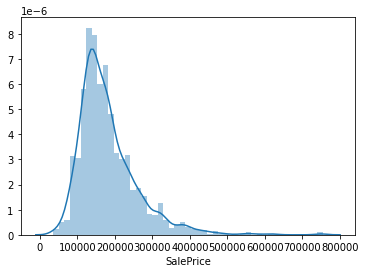

In [28]:
sns.distplot(train['SalePrice'])

In [29]:
train['SalePrice'].kurtosis()

6.536281860064529

In [30]:
train['SalePrice'].skew()

1.8828757597682129

# Nan Data

Для заполнения пропусков в данных я буду использовать расстояние до самого похожего объекта. Метрику реализую уникальную исходя из DataFrame 

In [31]:
#Очищенный DF от пропусков 
df_drop = train.dropna()

#Уравним длины df
train.drop('SalePrice', axis=1, inplace=True)

#Очищенный DF от пропусков 
df_drop = train.dropna()
#Перезапишем список непрерывных и вещественных величин
number_columns = [] #вещественные признаки
cat_columns = [] #дискретные признаки

for i in train.columns: # разбиение признаков на вещественные и дискретные 
    if(train[i].nunique() > 45):
        number_columns.append(i)
    else:
        cat_columns.append(i)

## FireplaceQu

Признак означает качество камина<br>
Который принимает следубщие значения: 
- Ex отличная кладка 
- Gd хороша кладка 
- TA средние качество кладки 
- Fa сборный камин в подвале 
- Po дешевый (точнее печка)
- Na нет камина вообще 

Далее необходимо выяснить на сколько хорошо каждый из других признаков может объяснить признак FireplaceQu

<b>MSSubClass</b>

Возьмем для примера значение признака FireplaceQu равное Ex. Это означает что камин с отличной кладкой, и посмотрим на то какое значение признак MSSubClass принимает чаще всего при условии что у камина отличная кладка.

In [33]:
a = df_drop[(df_drop['FireplaceQu'] == 'Ex')]['MSSubClass'].mode()[0]
print(f'Модальность = {a}')

Модальность = 20


Теперь посчитаем какое кол во наблюдений MSSubClass равно при условии FireplaceQu == Ex

In [34]:
q = len(df_drop[(df_drop['FireplaceQu']=='Ex') & (df_drop['MSSubClass']==a)])
print(f'Кол - во наблюдений MSSubClass при условии FireplaceQu == Ex = {q}')

Кол - во наблюдений MSSubClass при условии FireplaceQu == Ex = 9


Далее посчитаем все остальные кол ва наблюдений признакака MSSubClass при других условиях FireplaceQu == Ex

In [35]:
w = len(df_drop[(df_drop['FireplaceQu']=='Ex') & (df_drop['MSSubClass']==60)])
e = len(df_drop[(df_drop['FireplaceQu']=='Ex') & (df_drop['MSSubClass']==120)])
r = len(df_drop[(df_drop['FireplaceQu']=='Ex') & (df_drop['MSSubClass']==50)])
t = len(df_drop[(df_drop['FireplaceQu']=='Ex') & (df_drop['MSSubClass']==75)])

И в завершении посчитаем сколько % модальность признака MSSubClass занимает от общего кол во наблюдений

In [59]:
y = w+e+r+t+q
print(f'Модальность == {q / y *100}%')

Модальность == 45.0%


Таким образом если нам зададут вопрос о том чему равен признак MSSubClass при условии что у камина отлична кладка, мы сможем ответить что признак MSSubClass равен 20. Так как у квартир с отличной кминной кладкой признак MSSubClass равен 20 в 40% случаях. Возвращаясь к идеии написания собстевенной метрики дистанции, я задам коэфициент 4,5 если признак FireplaceQu принимает значение Ex

<b>LotFrontage<b>

В прошлом примере было описание того, как одна дискретная влечина может объяснить другую дискретную велечину. Теперь задача другая. Непрерывная величина должна объяснить дискретную.Во первых посмотрим на распределение данных под каждую дискретную велечину. Для того чтобы непрерывная величина хорошо описывала дискретную величину должно получится распределение похожее на нормальное

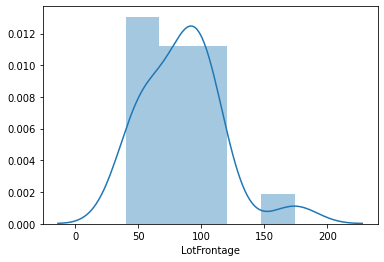

In [74]:
sns.distplot(df_drop[(df_drop['FireplaceQu'] == 4)]['LotFrontage'])

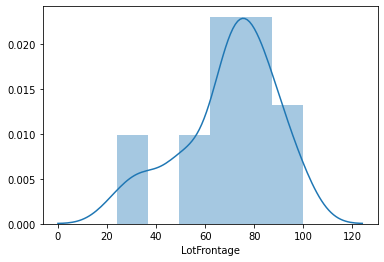

In [75]:
sns.distplot(df_drop[(df_drop['FireplaceQu'] == 3)]['LotFrontage'])

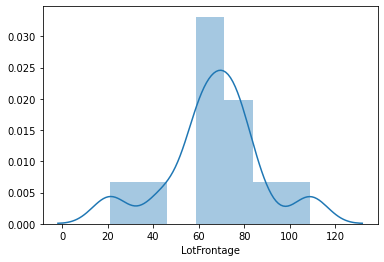

In [76]:
sns.distplot(df_drop[(df_drop['FireplaceQu'] == 2)]['LotFrontage'])

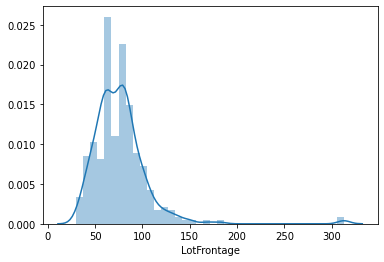

In [77]:
sns.distplot(df_drop[(df_drop['FireplaceQu'] == 1)]['LotFrontage'])

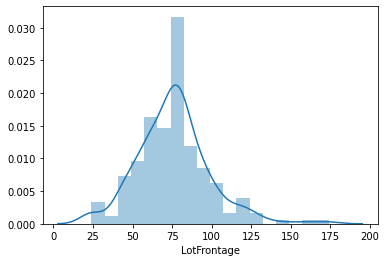

In [78]:
sns.distplot(df_drop[(df_drop['FireplaceQu'] == 0)]['LotFrontage'])

Каждый раз строить графики будет несовсем удобно, темболее сравнить их будет ещё неудобнее, так как возможно получить почти 2 одинаковых графика, а делать сравнения на глаз неправильно. В таком случае лучше посчитать эксцесс расппределения.

In [83]:
df_drop[(df_drop['FireplaceQu'] == 0)]['LotFrontage'].kurtosis()

2.0918924588702827

In [84]:
df_drop[(df_drop['FireplaceQu'] == 1)]['LotFrontage'].kurtosis()

23.610342312732797

In [85]:
df_drop[(df_drop['FireplaceQu'] == 2)]['LotFrontage'].kurtosis()

1.7980784020161202

In [86]:
df_drop[(df_drop['FireplaceQu'] == 3)]['LotFrontage'].kurtosis()

0.10327950787503326

In [87]:
df_drop[(df_drop['FireplaceQu'] == 4)]['LotFrontage'].kurtosis()

2.4579043345671368

In [88]:
def explain_feature_discret(fx):
    n_value = [df_drop[fx].unique()]
    
    for i in df_drop.columns:
        if(df_drop[i].nunique() <45) and(i != fx):
            for v in n_value[0]:
                explain_discret(df_drop,fx,v,i)
        else:
            for tmp in n_value[0]:
                explain_number(df_drop,fx,tmp,i)
    
    
    
def explain_discret(df,a,b,c):
    o = []
    for i in df[(df[a] == b)][c].unique():
        o.append(len(df[(df[a]== b)&(df[c]==i)]))
        
    a_1 = df[(df[a] == b)][c].mode()[0]
    b_1 = len(df[(df[a] == b)& (df_drop[c] == a_1)]) / sum(o)*100
    print(f'Признак {a} значение {b} объяснен признаком {c} на {b_1} ')
    
    
def explain_number(df,a,b,c):
    a_2 = df[(df[a] == b)][c].kurtosis()
    print(f'Признак {a} значение {b} объяснен признаком {c} с эксцессом {a_2}')

Далее я закодирую категориальные признаки LavelEncoder так как в дальнейшем я буду передвать свою метрику алгоритму KNN

In [89]:
def labelencoder(x): #подать на вход df_drop['FireplaceQu']
    name = x.name #получить имя признака #FireplaceQu
    for i in conveer: #пройти по каждому DF
        label = [i[name].unique()] #получить исходные метки
        #print(label)
        label_2 = [] #список меток без nan
        for tmp in label[0]: #пройти по меткам и проверить вхождение None
            if(pd.isna(tmp) == True): #проверка None
                pass
            else:
                label_2.append(tmp)
            
        #if(i[name].isnull().sum() !=0):
        replaces = np.arange(0,len(label_2)) #то что будем перезаписывать для меток
        print(label_2)
        print(replaces)
        print(len(label_2) == len(replaces))
        i[name] = i[name].replace(label_2,replaces) #перезапись меток
        
        
            
    df_drop[name] = df_drop[name].replace(label_2,replaces)
    #print(f'label_2 = {label_2}, replaces = {replaces}')
    #print(len(label_2) == len(replaces))

In [90]:
labelencoder(train['FireplaceQu'])

[0.0, 1.0, 2.0, 3.0, 4.0]
[0 1 2 3 4]
True
[0.0, 1.0, 2.0, 3.0, 4.0]
[0 1 2 3 4]
True


In [91]:
explain_feature_discret(df_drop['FireplaceQu'].name)

Признак FireplaceQu значение 0 объяснен признаком MSSubClass на 42.45283018867924 
Признак FireplaceQu значение 1 объяснен признаком MSSubClass на 34.92063492063492 
Признак FireplaceQu значение 4 объяснен признаком MSSubClass на 45.0 
Признак FireplaceQu значение 3 объяснен признаком MSSubClass на 54.166666666666664 
Признак FireplaceQu значение 2 объяснен признаком MSSubClass на 41.66666666666667 
Признак FireplaceQu значение 0 объяснен признаком MSZoning на 93.86792452830188 
Признак FireplaceQu значение 1 объяснен признаком MSZoning на 82.85714285714286 
Признак FireplaceQu значение 4 объяснен признаком MSZoning на 90.0 
Признак FireplaceQu значение 3 объяснен признаком MSZoning на 91.66666666666666 
Признак FireplaceQu значение 2 объяснен признаком MSZoning на 66.66666666666666 
Признак FireplaceQu значение 0 объяснен признаком LotFrontage с эксцессом 2.0918924588702827
Признак FireplaceQu значение 1 объяснен признаком LotFrontage с эксцессом 23.610342312732797
Признак FireplaceQu

Признак FireplaceQu значение 4 объяснен признаком Foundation на 90.0 
Признак FireplaceQu значение 3 объяснен признаком Foundation на 79.16666666666666 
Признак FireplaceQu значение 2 объяснен признаком Foundation на 75.0 
Признак FireplaceQu значение 0 объяснен признаком BsmtQual на 65.09433962264151 
Признак FireplaceQu значение 1 объяснен признаком BsmtQual на 39.682539682539684 
Признак FireplaceQu значение 4 объяснен признаком BsmtQual на 70.0 
Признак FireplaceQu значение 3 объяснен признаком BsmtQual на 66.66666666666666 
Признак FireplaceQu значение 2 объяснен признаком BsmtQual на 66.66666666666666 
Признак FireplaceQu значение 0 объяснен признаком BsmtCond на 93.86792452830188 
Признак FireplaceQu значение 1 объяснен признаком BsmtCond на 88.88888888888889 
Признак FireplaceQu значение 4 объяснен признаком BsmtCond на 100.0 
Признак FireplaceQu значение 3 объяснен признаком BsmtCond на 100.0 
Признак FireplaceQu значение 2 объяснен признаком BsmtCond на 91.66666666666666 
При

Признак FireplaceQu значение 0 объяснен признаком TotRmsAbvGrd на 33.490566037735846 
Признак FireplaceQu значение 1 объяснен признаком TotRmsAbvGrd на 25.07936507936508 
Признак FireplaceQu значение 4 объяснен признаком TotRmsAbvGrd на 30.0 
Признак FireplaceQu значение 3 объяснен признаком TotRmsAbvGrd на 41.66666666666667 
Признак FireplaceQu значение 2 объяснен признаком TotRmsAbvGrd на 41.66666666666667 
Признак FireplaceQu значение 0 объяснен признаком Functional на 91.0377358490566 
Признак FireplaceQu значение 1 объяснен признаком Functional на 96.19047619047619 
Признак FireplaceQu значение 4 объяснен признаком Functional на 100.0 
Признак FireplaceQu значение 3 объяснен признаком Functional на 95.83333333333334 
Признак FireplaceQu значение 2 объяснен признаком Functional на 100.0 
Признак FireplaceQu значение 0 объяснен признаком Fireplaces на 83.9622641509434 
Признак FireplaceQu значение 1 объяснен признаком Fireplaces на 87.3015873015873 
Признак FireplaceQu значение 4 об

Признак FireplaceQu значение 2 объяснен признаком YrSold на 33.33333333333333 
Признак FireplaceQu значение 0 объяснен признаком SaleType на 94.81132075471697 
Признак FireplaceQu значение 1 объяснен признаком SaleType на 73.65079365079366 
Признак FireplaceQu значение 4 объяснен признаком SaleType на 70.0 
Признак FireplaceQu значение 3 объяснен признаком SaleType на 100.0 
Признак FireplaceQu значение 2 объяснен признаком SaleType на 100.0 
Признак FireplaceQu значение 0 объяснен признаком SaleCondition на 90.56603773584906 
Признак FireplaceQu значение 1 объяснен признаком SaleCondition на 72.06349206349206 
Признак FireplaceQu значение 4 объяснен признаком SaleCondition на 60.0 
Признак FireplaceQu значение 3 объяснен признаком SaleCondition на 87.5 
Признак FireplaceQu значение 2 объяснен признаком SaleCondition на 100.0 


# Distance

In [113]:
def distance_FireplaceQu(x,y):
    d = 0
    if(pd.isna(x[0]) == True)or(pd.isna(y[0]) == True): #MSSubClass
        d +=2
    else:
        if(x[55]==0): 
            d += 4.2*(x[0]!=y[0])
        elif(x[55]==1):
            d += 3.4*(x[0]!=y[0])
        elif(x[55]==2):
            d += 4.1*(x[0]!=y[0])
        elif(x[55]==3):
            d += 5.4*(x[0]!=y[0])
        elif(x[55]==4):
            d += 4.5*(x[0]!=y[0])
    
    if(pd.isna(x[1]) == True)or(pd.isna(y[1]) == True): #MSZoning
        d +=2
    else:
        if(x[55]==0):
            d += 9.3*(x[1]!=y[1])
        elif(x[55]==1):
            d += 8.2*(x[1]!=y[1])
        elif(x[55]==2):
            d += 6.6*(x[1]!=y[1])
        elif(x[55]==3):
            d += 9.2*(x[1]!=y[1])
        elif(x[55]==4):
            d += 9*(x[1]!=y[1])
        
    if(pd.isna(x[2]) == True)or(pd.isna(y[2]) == True): #LotFrontage       
        d += 2
    else:
        d += (x[2]-y[2])**2
      
    
    if(pd.isna(x[3]) == True)or(pd.isna(y[3]) == True): #LotArea
        d += 2
    else:
        d += (x[3]-y[3])**2
    
                


In [33]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'